In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

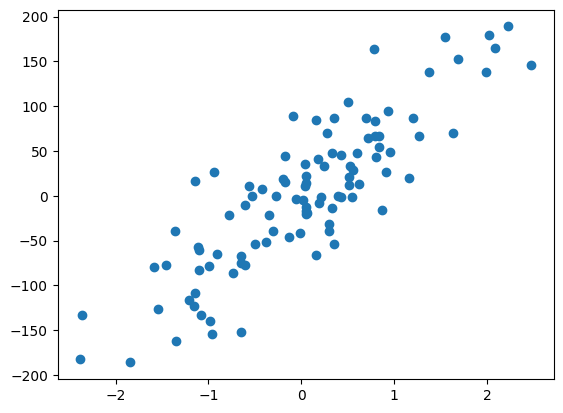

In [25]:
X, y = make_regression(n_samples=100,n_features=1,n_informative=1, n_targets=1,noise=50, random_state =4)
plt.scatter(X,y)

# Now lets start the linear regression 

In [58]:
class GDReg():
    def __init__(self,learning_rate,epochs,m,b):
        self.m = m
        self.b = b
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        for i in range(self.epochs):
            #Applying Gradient Descent on loss function to calculate "m" and "b"
            loss_slope_b = -2*np.sum(y-self.m*X.ravel()-self.b)    #Calculating slope wrt "b"
            self.b = self.b - (self.learning_rate*loss_slope_b)                      #(b new = b old - lr*slope_b)  Calculating b
            loss_slope_m = -2*np.sum((y-self.m*X.ravel()-self.b)*(X.ravel()))    #Calculating slope wrt "m"
            self.m = self.m - (self.learning_rate*loss_slope_m)                      #(b new = b old - lr*slope_b)  Calculating m
        return (self.m,self.b)

In [59]:
# Using the GDReg
LR = GDReg(0.01,100,20,-10)

In [60]:
m ,b = LR.fit(X,y)

In [61]:
# Now prediction
y_pred = m*X.ravel()+b    # y = mx+b

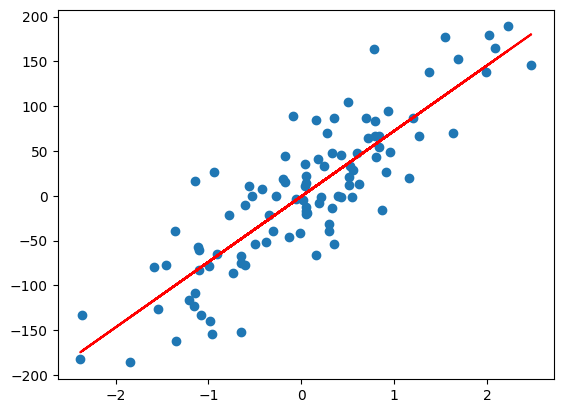

In [63]:
plt.scatter(X,y)
plt.plot(X,y_pred,color = 'red')

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [51]:
reg.fit(X,y)

LinearRegression()

In [53]:
y_pred_reg = reg.predict(X)

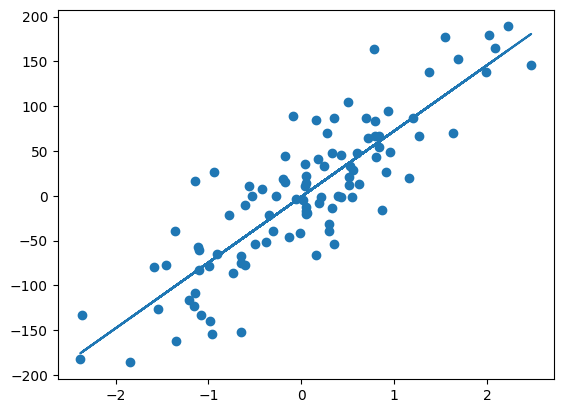

In [54]:
plt.scatter(X,y)
plt.plot(X,y_pred_reg,colr)